<a href="https://colab.research.google.com/github/joony0512/Linear_Programming/blob/main/LinearProgramming_Nutrient.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install pulp


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.3/14.3 MB 25.8 MB/s eta 0:00:00


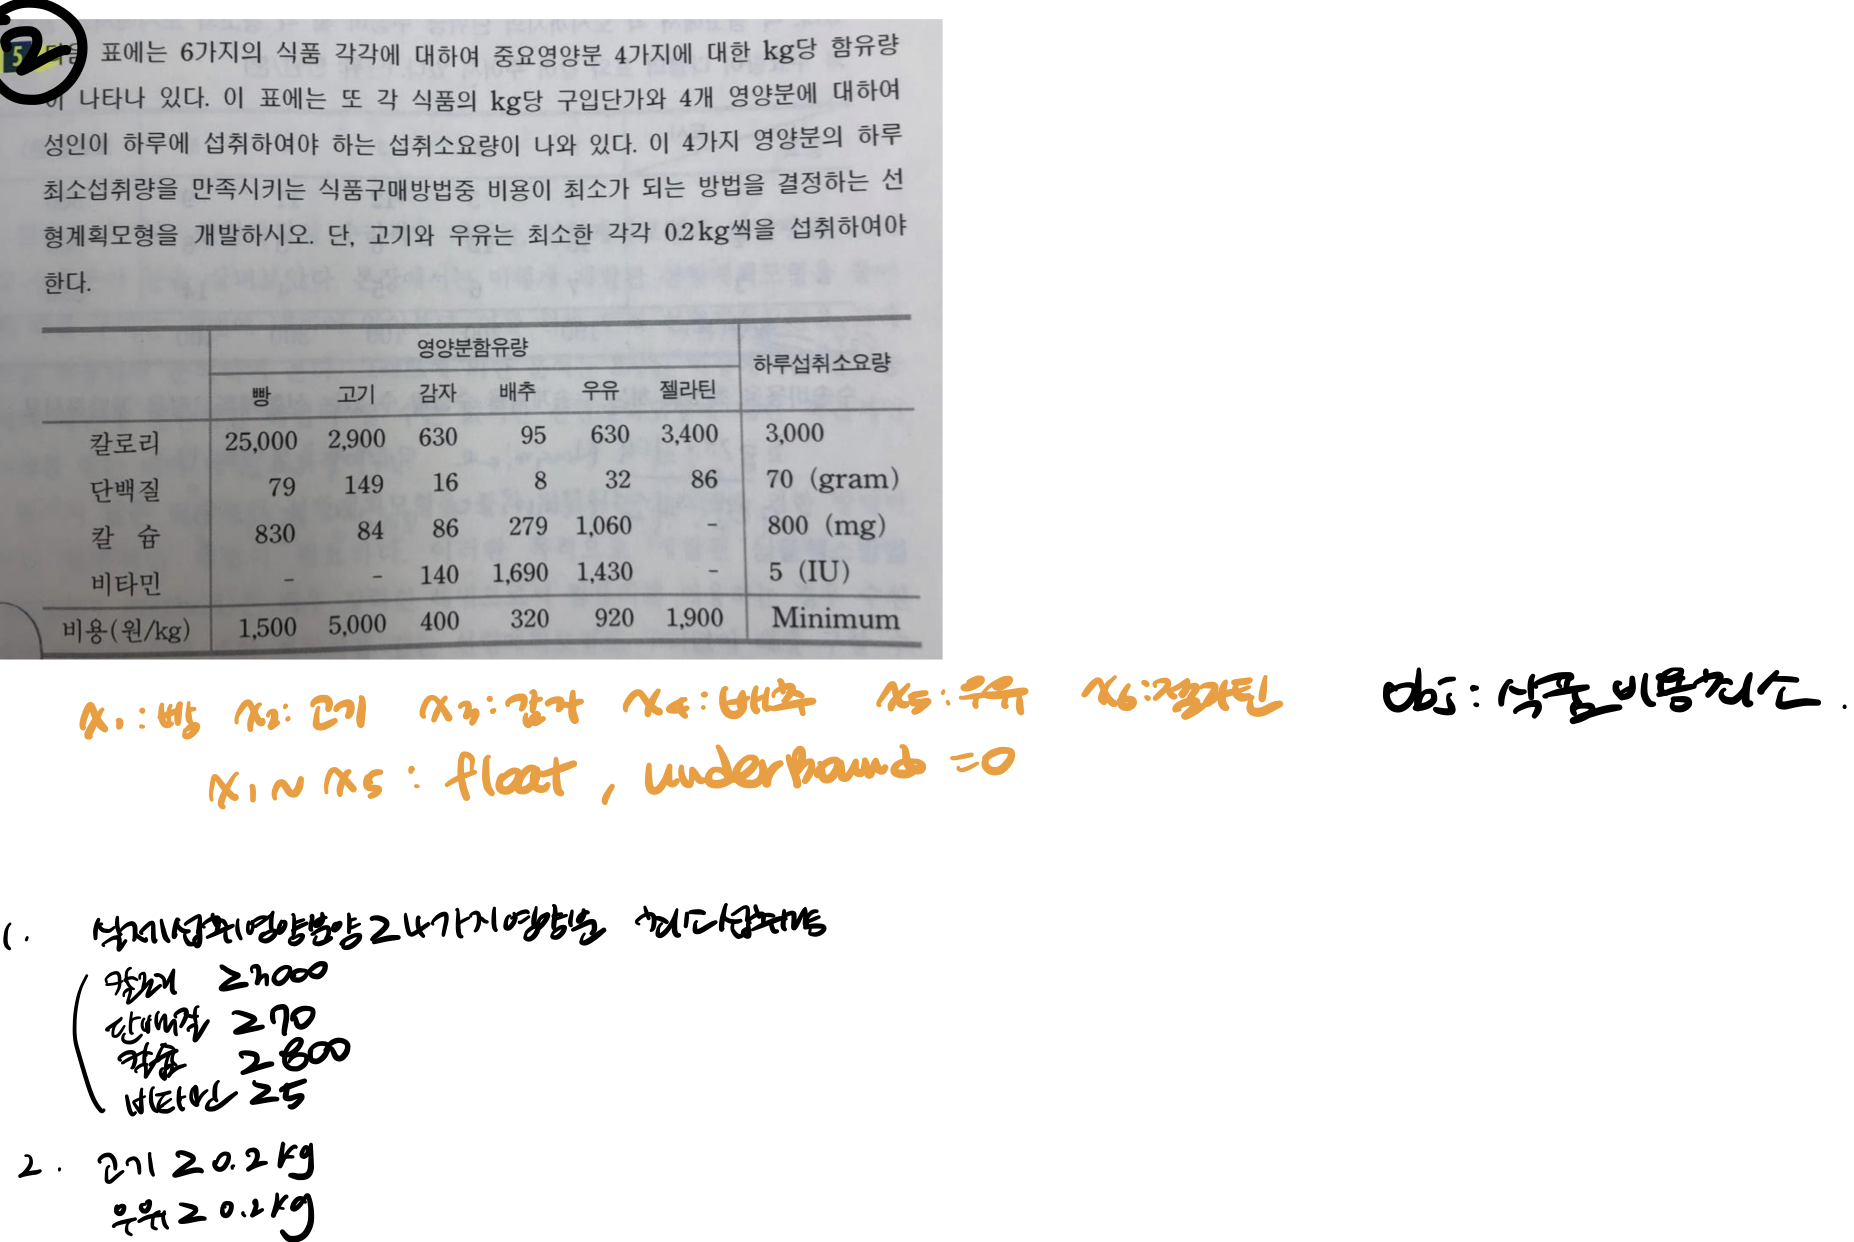

In [2]:
from pulp import *

In [19]:
model = LpProblem(name ='Nutrients', sense =LpMinimize)

num_variables =6
variables = [LpVariable(name= f'x{i}', lowBound=0) for i in range(1, num_variables+1)]

#1
num_constraints = 4
constraints =[]
const_coeff = [[25000, 2900, 630, 95, 630, 3400], [79, 149, 16, 8, 32, 86],[830, 84, 86, 279, 1060, 0], [0,0,140,1690, 1430,0]]
for i in range(num_constraints):
  rhs_values = [3000, 70, 800, 5]
  constr_sup = LpConstraint(
      e=LpAffineExpression([(variables[j], const_coeff[i][j]) for j in range(num_variables)]),
      sense = LpConstraintGE,
      rhs = rhs_values[i],
      name =f'constraint_sup{i+1}'
  )
  constraints.append(constr_sup)

#2


num_const2 =2
const_coeff2 = [1,1]
j =[1,4]
for i in range(num_const2):
  rhs_values = [0.2,0.2]

  constr_sup = LpConstraint(
      e=LpAffineExpression([(variables[j[i]], const_coeff2[i])] ),
      sense = LpConstraintGE,
      rhs = rhs_values[i],
      name =f'constraint_sup{i+5}'
  )
  constraints.append(constr_sup)



obj_coeff = [1500, 5000, 400, 320, 920, 1900]
obj = LpAffineExpression([(variables[i], obj_coeff[i]) for i in range(num_variables)])
model += obj

for constraint in constraints:
  model +=constraint

print(model)
model.writeLP('out.txt')

model.solve()

for variable in variables:
  print(f'{variable.name} : {variable.value()}')

print(f'Optimal object value: {model.objective.value()}')

Nutrients:
MINIMIZE
1500*x1 + 5000*x2 + 400*x3 + 320*x4 + 920*x5 + 1900*x6 + 0
SUBJECT TO
constraint_sup1: 25000 x1 + 2900 x2 + 630 x3 + 95 x4 + 630 x5 + 3400 x6
 >= 3000

constraint_sup2: 79 x1 + 149 x2 + 16 x3 + 8 x4 + 32 x5 + 86 x6 >= 70

constraint_sup3: 830 x1 + 84 x2 + 86 x3 + 279 x4 + 1060 x5 + 0 x6 >= 800

constraint_sup4: 0 x1 + 0 x2 + 140 x3 + 1690 x4 + 1430 x5 + 0 x6 >= 5

constraint_sup5: x2 >= 0.2

constraint_sup6: x5 >= 0.2

VARIABLES
x1 Continuous
x2 Continuous
x3 Continuous
x4 Continuous
x5 Continuous
x6 Continuous

x1 : 0.3069185
x2 : 0.2
x3 : 0.0
x4 : 0.0
x5 : 0.49854495
x6 : 0.0
Optimal object value: 1919.039104
